In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('advertising.csv')
df.head()

Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

In [2]:
df.describe()

Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000

0.025430412805360583
0.8849948046685562


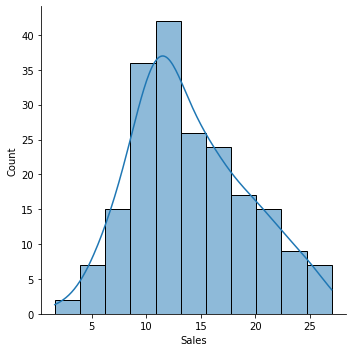

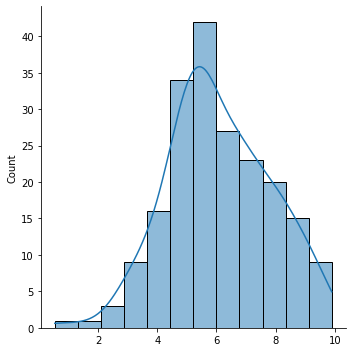

In [3]:
import seaborn as sns
# distribution plot of the target variable
sns.displot(df['Sales'], kde=True)

# statistical test
# computing the p-value for the null-hypothesis that this distribution is a normal distribution
from scipy import stats
_, p = stats.normaltest(df['Sales'])
print(p)

# y - transformation (box cox)
from scipy.stats import boxcox
y_bc, lambda_bc = boxcox(df['Sales'])
_, p = stats.normaltest(y_bc)
print(p)
sns.displot(y_bc, kde=True)

from scipy.special import inv_boxcox
y_init = inv_boxcox(y_bc, lambda_bc)
# print(y_init)

In [4]:
dataset = df.values
# extract the features (independent variables)
X = dataset[:,1:4]
print(X[0:10])

[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]
 [  8.7  48.9  75. ]
 [ 57.5  32.8  23.5]
 [120.2  19.6  11.6]
 [  8.6   2.1   1. ]
 [199.8   2.6  21.2]]


In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
print(X_scaled[0:10])
print("Mean of first feature:", np.mean(X_scaled[:,0]), "\nStdev of first feature:", np.std(X_scaled[:,0]))

[[ 0.96985227  0.98152247  1.77894547]
 [-1.19737623  1.08280781  0.66957876]
 [-1.51615499  1.52846331  1.78354865]
 [ 0.05204968  1.21785493  1.28640506]
 [ 0.3941822  -0.84161366  1.28180188]
 [-1.61540845  1.73103399  2.04592999]
 [-1.04557682  0.64390467 -0.32470841]
 [-0.31343659 -0.24740632 -0.87248699]
 [-1.61657614 -1.42906863 -1.36042422]
 [ 0.61604287 -1.39530685 -0.43058158]]
Mean of first feature: 1.2212453270876723e-16 
Stdev of first feature: 1.0


In [6]:
# extract the dependent (target) variable
y = dataset[:,4]
print(y[0:10])

[22.1 10.4  9.3 18.5 12.9  7.2 11.8 13.2  4.8 10.6]


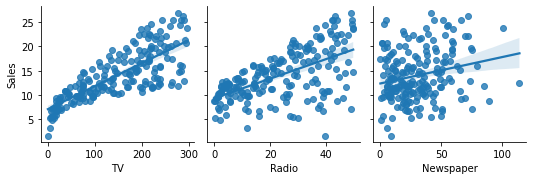

In [7]:
# Checking main assumptions of Linear Regression: linearity, normality, multicollinearity and homoscedasticity.
# 1) Assumption (Linearity)
sns.pairplot(df,x_vars=["TV","Radio","Newspaper"],y_vars= "Sales",kind="reg")

Sales         1.000000
TV            0.782224
Radio         0.576223
Newspaper     0.228299
Unnamed: 0   -0.051616
Name: Sales, dtype: float64


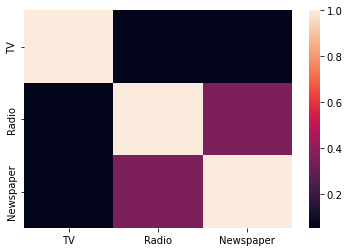

In [8]:
import matplotlib.pyplot as plt

# 2) Assumption (Multicollinearity):
df_features = df[["TV","Radio","Newspaper"]]
a = df.corr()['Sales'].sort_values(ascending=False)
print(a)

sns.heatmap(data=df_features.corr())
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size=0.25)

from sklearn.linear_model import LinearRegression
lregr = LinearRegression()

# train model (Fit linear model) and evaluate model β coefficients
# NON Standardized
print("NON Standardized")
model = lregr.fit(X_train, y_train)
# print model intercept
print("β0 =", model.intercept_)
# print model coefficients
print("[β1,β2,β3] =", model.coef_)

# estimate residuals
# predict
y_pred = model.predict(X_test)
# residuals is the differences between real y values and predicted y values
residuals = y_test - y_pred
print('Residuals:',residuals[:10])
#print(np.mean(residuals))
#print(np.std(residuals))

NON Standardized
β0 = 2.89257005115115
[β1,β2,β3] = [0.04416235 0.19900368 0.00116268]
Residuals: [ 1.2505431   0.96947665  1.72847857  1.23621333 -0.30215643  2.15665355
 -5.89526331 -1.75879164 -1.80528358  0.32765447]


In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_scaled = sc.fit_transform(X)
print(X_scaled[0:10])
#y_scaled = np.squeeze(sc.fit_transform(y.reshape(-1, 1)))
y_scaled, lambda_bc = boxcox(y)
print(y_scaled[0:10])

X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(X_scaled, y_scaled, random_state = 0,test_size=0.25)

lregr_scaled = LinearRegression()

# train model (Fit linear model) and evaluate model β coefficients
# Standardized
print("Standardized")
model_scaled = lregr_scaled.fit(X_scaled_train, y_scaled_train)
# print model intercept
print("β0 =", model_scaled.intercept_)
# print model coefficients
print("[β1,β2,β3] =", model_scaled.coef_)

# estimate residuals
# predict
y_scaled_pred = model_scaled.predict(X_scaled_test)
#y_pred = sc.inverse_transform(y_scaled_pred)
#print(y_pred)

residuals_scaled = y_scaled_test - y_scaled_pred
print('Residuals:', residuals_scaled[:10])
#print(np.mean(residuals_scaled))
#print(np.std(residuals_scaled))

[[ 0.96985227  0.98152247  1.77894547]
 [-1.19737623  1.08280781  0.66957876]
 [-1.51615499  1.52846331  1.78354865]
 [ 0.05204968  1.21785493  1.28640506]
 [ 0.3941822  -0.84161366  1.28180188]
 [-1.61540845  1.73103399  2.04592999]
 [-1.04557682  0.64390467 -0.32470841]
 [-0.31343659 -0.24740632 -0.87248699]
 [-1.61657614 -1.42906863 -1.36042422]
 [ 0.61604287 -1.39530685 -0.43058158]]
[8.62268888 4.96674482 4.54776147 7.61169565 5.8546036  3.6846038
 5.47381496 5.95604738 2.55346522 5.04087376]
Standardized
β0 = 6.106073717708718
[β1,β2,β3] = [1.2709407  0.92409094 0.01009824]
Residuals: [ 0.5231147   0.25668614  0.48125926  0.06915448 -0.04851437  0.64883826
 -1.9886747  -0.52477839 -0.52339043  0.19356075]


In [11]:
from sklearn.linear_model import SGDRegressor
sgdr_scaled = SGDRegressor()

# train model (Fit linear model) and evaluate model β coefficients
model_sgdr = sgdr_scaled.fit(X_scaled_train, y_scaled_train)
# print model intercept
print("β0 =", model_sgdr.intercept_)
# print model coefficients
print("[β1,β2,β3] =", model_sgdr.coef_)

# estimate residuals
# predict and estimate residuals
y_sgdr_pred = model_sgdr.predict(X_scaled_test)
residuals_sgdr = y_scaled_test - y_sgdr_pred
print("Residuals:", residuals_sgdr[:10])

#print(np.mean(residuals_scaled))
#print(np.std(residuals_scaled))

β0 = [6.08409604]
[β1,β2,β3] = [1.27601515 0.91751542 0.01431579]
Residuals: [ 0.55085661  0.28159468  0.49782485  0.08712297 -0.0356769   0.66856602
 -1.95574608 -0.51116001 -0.49571709  0.21573368]


Mean of Residuals -0.11583198439137797
Standard deviation of Residuals 1.9997701053643782
p-value: 3.463801353587156e-10


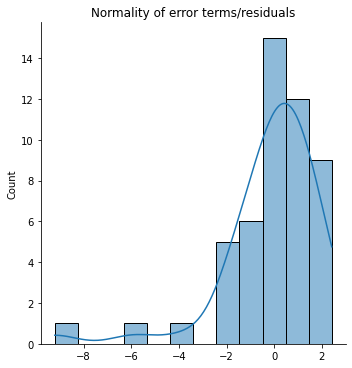

Mean of Scaled Residuals -0.06361503883179391
Standard deviation of Scaled Residuals 0.7805996611025489
p-value: 4.668655843075813e-16


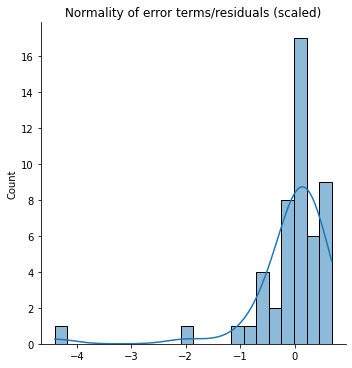

In [12]:
# 3) Assumption (Normality of error terms/residuals):
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))
std_residuals = np.std(residuals)
print("Standard deviation of Residuals {}".format(std_residuals))
_, p = stats.normaltest(residuals)
print("p-value:",p)

sns.displot(data=residuals,kde=True)
plt.title('Normality of error terms/residuals')
plt.show()

mean_scaled_residuals = np.mean(residuals_scaled)
print("Mean of Scaled Residuals {}".format(mean_scaled_residuals))
std_scaled_residuals = np.std(residuals_scaled)
print("Standard deviation of Scaled Residuals {}".format(std_scaled_residuals))
_, p = stats.normaltest(residuals_scaled)
print("p-value:",p)

sns.displot(data=residuals_scaled,kde=True)
plt.title('Normality of error terms/residuals (scaled)')
plt.show()

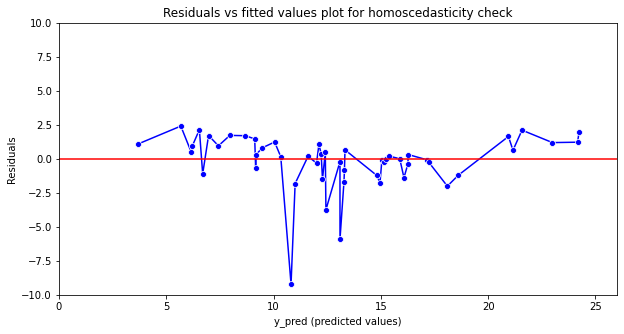

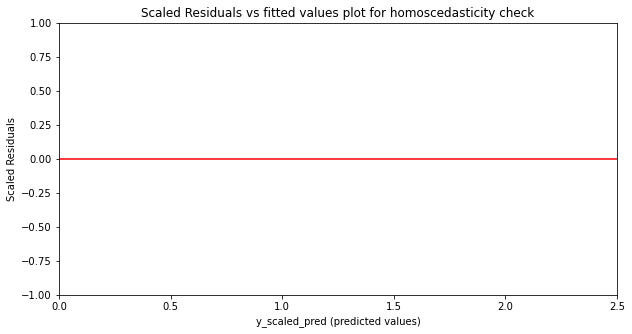

"\n# Model Prediction\nnew_data = [[30],[10],[45]]\nimport pandas as pd\nnew_data = pd.DataFrame({'TV': [30], 'Radio': [10], 'Newspaper': [45]})\nnew_data\n"

In [13]:
# 4) Homoscedasticity
plt.figure(figsize=(10,5))
sns.lineplot(x=y_pred,y=residuals,marker='o',color='blue')
plt.xlabel('y_pred (predicted values)')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
sns.lineplot(x=[0,26],y=[0,0],color='red')
plt.title('Residuals vs fitted values plot for homoscedasticity check')
plt.show()

plt.figure(figsize=(10,5))
sns.lineplot(x=y_scaled_pred,y=residuals_scaled,marker='o',color='blue')
plt.xlabel('y_scaled_pred (predicted values)')
plt.ylabel('Scaled Residuals')
plt.ylim(-1,1)
plt.xlim(0,2.5)
sns.lineplot(x=[0,2.5],y=[0,0],color='red')
plt.title('Scaled Residuals vs fitted values plot for homoscedasticity check')
plt.show()

"""
# Model Prediction
new_data = [[30],[10],[45]]
import pandas as pd
new_data = pd.DataFrame({'TV': [30], 'Radio': [10], 'Newspaper': [45]})
new_data
"""

In [14]:
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(residuals , lags = 40, return_df=False)[1])

0.12377711267582664

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# prediction on test data
# Unstandardized model
y_pred = model.predict(X_test)
print(y_pred[0:10])

# Mean Squared Error (MSE)
MSE = mean_squared_error(y_test, y_pred)
# Root Mean Squared Error (RMSE)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, y_pred)
print("MSE:" , MSE, ", RMSE:", RMSE, ", R2:", r2)

[10.0494569   7.43052335  6.97152143 24.16378667 12.00215643  6.54334645
 13.09526331 14.95879164 11.00528358 16.27234553]
MSE: 4.0124975229171005 , RMSE: 2.003121944095541 , R2: 0.8576396745320893


In [16]:
# Standardized model
y_scaled_pred = model_scaled.predict(X_scaled_test)
print(y_scaled_pred[0:10])
y_unscaled_pred = inv_boxcox(y_scaled_pred, lambda_bc)
print(y_unscaled_pred[0:10])

# Mean Squared Error (MSE)
MSE_scaled = mean_squared_error(y_scaled_test, y_scaled_pred)
# Root Mean Squared Error (RMSE)
RMSE_scaled = np.sqrt(MSE_scaled)
r2_scaled = r2_score(y_scaled_test, y_scaled_pred)
print("MSE:",MSE_scaled,", RMSE:", RMSE_scaled, ", R2:", r2_scaled)

# REVERSE TRANSFORMATION TO BRING target values to the original scale
y_unscaled_test = inv_boxcox(y_scaled_test, lambda_bc)
# Mean Squared Error (MSE)
MSE_unscaled = mean_squared_error(y_unscaled_test, y_unscaled_pred)
# Root Mean Squared Error (RMSE)
RMSE_unscaled = np.sqrt(MSE_unscaled)
r2_unscaled = r2_score(y_unscaled_test, y_unscaled_pred)
print("MSE:",MSE_unscaled,", RMSE:", RMSE_unscaled, ", R2:", r2_unscaled)

[4.77267884 3.93244404 3.8291399  9.42060306 5.48698372 3.6615609
 5.6732785  6.48082577 5.03205064 6.85102264]
[ 9.88404879  7.77972763  7.53578493 25.12971346 11.83734894  7.14706496
 12.37103898 14.79810339 10.57611093 15.97149646]
MSE: 0.6133827040789849 , RMSE: 0.7831875280410081 , R2: 0.8136013124013133
MSE: 3.1992081378997743 , RMSE: 1.7886330361199791 , R2: 0.8864945562832662


In [17]:
from sklearn import model_selection

# initialize k-folds cross-validator, with k=10
kfold = model_selection.KFold(n_splits=10)

lr = LinearRegression()
# Evaluate the models using crossvalidation
scores = model_selection.cross_val_score(lr, X, y, scoring="neg_root_mean_squared_error", cv=kfold)

print(-scores.mean())

1.6913531708051799


In [18]:
# Model Tuning
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 99)
lm = LinearRegression()
model = lm.fit(X_train, y_train)
print("Train Set Mean Squared Error: " ,np.sqrt(mean_squared_error(y_train, model.predict(X_train))))
print("Test Set Mean Sqaured Error: ", np.sqrt(mean_squared_error(y_test, model.predict(X_test))))

Train Set Mean Squared Error:  1.723682482265075
Test Set Mean Sqaured Error:  1.431278313830165


In [19]:
# Cross Validation
from sklearn.model_selection import cross_val_score
CV_MSE = np.mean(-cross_val_score(model, X_train, y_train, cv = 10 ,scoring = "neg_mean_squared_error" ))
CV_RMSE = np.sqrt(CV_MSE)
print("Validated Mean Squared Error: ", CV_MSE)
print("Validated Root Mean Squared Error: ", CV_RMSE)

Validated Mean Squared Error:  3.317028974234126
Validated Root Mean Squared Error:  1.8212712522395245
